In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

plt.rcParams['figure.figsize'] = [15,10]

In [4]:
!pip install opencv-python

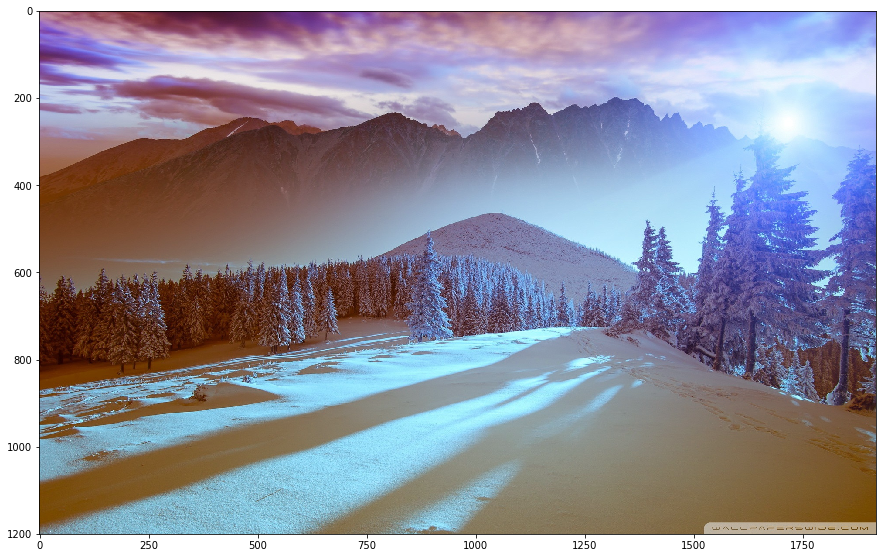

In [17]:
im = cv2.imread('img/landscape.jpg') # convert it to RBG

(h,w,c) = im.shape

(h,w,c)  # its 3 dimension
plt.imshow(im)

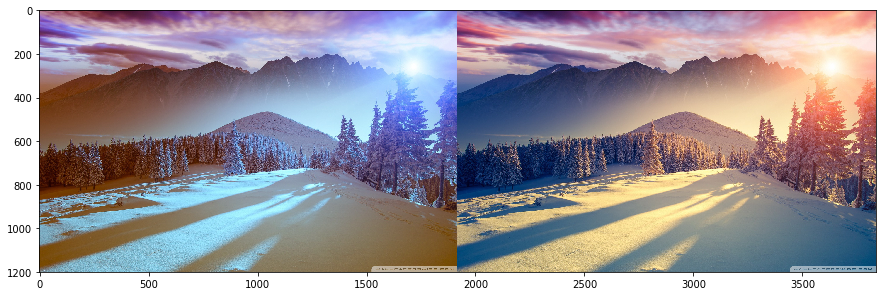

In [18]:
image = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(np.hstack([im,image]))
plt.show()

In [19]:
from sklearn.cluster import MiniBatchKMeans

In [20]:
image = image.reshape(h*w,3)

In [21]:
numClusters = 16

clt = MiniBatchKMeans(n_clusters = numClusters)
labels = clt.fit_predict(image)

In [23]:
labels.shape # (230400,) --> it has centroids index
labels[:5] #--> labels

array([2, 2, 2, 2, 2])

In [25]:
quant = clt.cluster_centers_.astype('uint8')[labels]

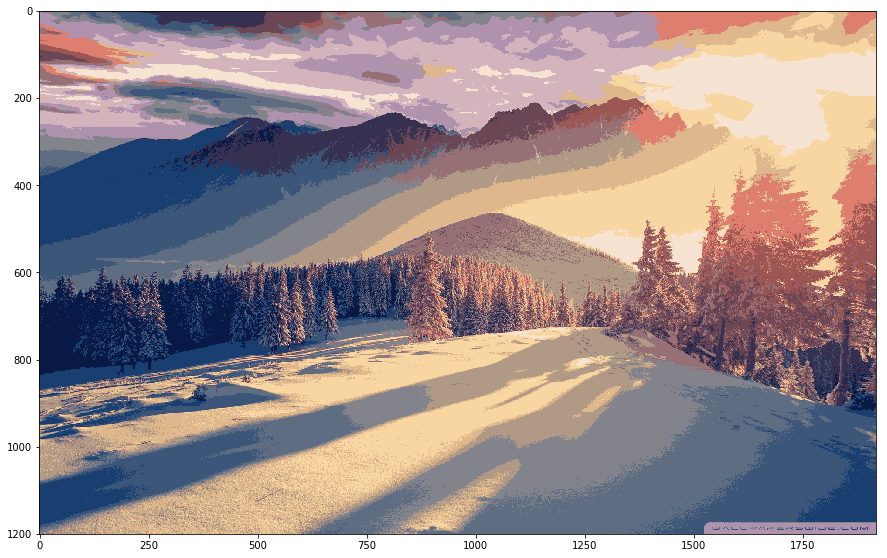

In [26]:
quant = quant.reshape((h,w,3))
plt.imshow(quant)
plt.show()

In [27]:
quant = cv2.cvtColor(quant,cv2.COLOR_RGB2BGR)
cv2.imwrite('output/compressed.jpg',quant)

True